In [11]:
using FluidDynTools
using PotentialFlow
using ViscousFlow
using Plots

In [12]:
center = 0.0
r = 1.0
Δs = π/50
z, n̂, Δslist = circle(center,r,Δs)
unit_sources = Source.Point.(z, 1.0);
targets = Elements.position.(unit_sources);

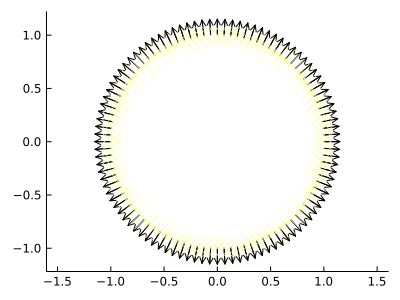

In [13]:
plot(unit_sources, ratio = 1)
quiver!(real.(targets), imag.(targets), quiver = 0.15.*(real.(n̂), imag.(n̂)), color = :black)
plot!(unit_sources, markersize = 10)

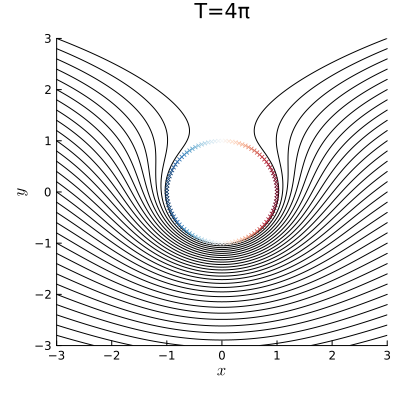

In [14]:
U∞ = 1.0+0im
zvort = 0.0+0.0im
Γvort = 4*π
other_elements = (Freestreams.Freestream(U∞),Vortex.Point.(zvort,Γvort))
sources, us, Cp, tx, ty = simulate_flow(unit_sources, Δslist, n̂, other_elements)

plot(tx, ty, color = colorant"black", xlabel = L"x", ylabel = L"y",
               xlim = (-3, 3), ylim = (-3, 3), size = (400, 400), title="Τ=4π")
plot!(sources, markersize = 2, color = :RdBu)

#savefig("hw2_p8_3.png")

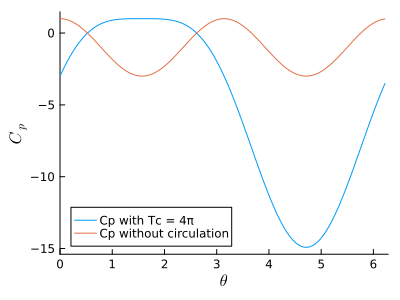

In [15]:
θ = range(0, 2π, length=length(Cp)+1)[1:end-1]
plot(θ,Cp,xlim=(0,2π),xlabel=L"\theta",ylabel=L"C_p", label="Cp with Τc = 4π", legend=true)
Cp2 = 1 .- 4*(sin.(θ)).^2
plot!(θ,Cp2,label="Cp without circulation")
#savefig("hw2_p8_4.png")

In [16]:
F = -sum(Cp.*n̂.*Δslist)

-5.551115123125783e-17 - 25.00580819220967im